## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




234545216/234545216 [==============================] - 38s 0us/step


In [5]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\thmalli\AppData\Local\Temp\ipykernel_6956\4130870686.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 348s 6s/step - loss: 1.2068 - accuracy: 0.8242 - val_loss: 0.0343 - val_accuracy: 1.0000
Epoch 2/20
61/61 [==============================] - 329s 5s/step - loss: 0.5326 - accuracy: 0.9200 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 324s 5s/step - loss: 0.2854 - accuracy: 0.9539 - val_loss: 0.7081 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - 363s 6s/step - loss: 0.2995 - accuracy: 0.9518 - val_loss: 0.5981 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 391s 6s/step - loss: 0.4393 - accuracy: 0.9513 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 361s 6s/step - loss: 0.3905 - accuracy: 0.9554 - val_loss: 0.3170 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 371s 6s/step - loss: 0.3290 - accuracy: 0.9590 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 8/20
61

In [15]:
import matplotlib.pyplot as plt

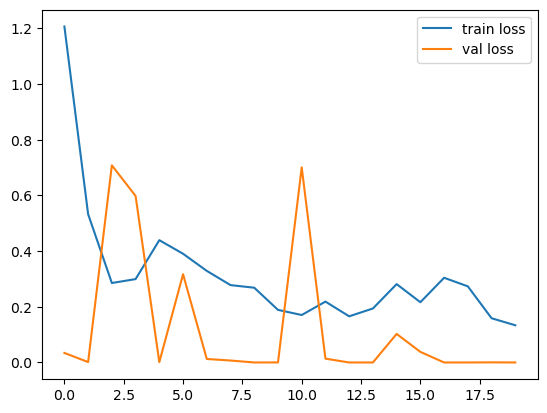

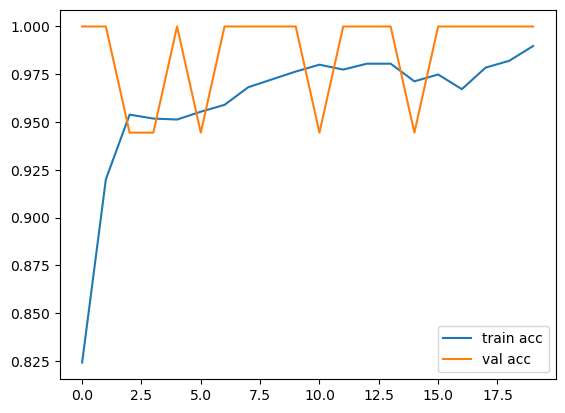

<Figure size 640x480 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

c:\Users\thmalli\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:

y_pred = model.predict(test_set)


1/1 [==============================] - 8s 8s/step


In [19]:
y_pred

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.96182143e-25],
       [1.17420294e-18, 1.48772272e-09, 1.00000000e+00, 1.08851383e-09],
       [1.40791944e-31, 2.40340192e-10, 1.47553858e-37, 1.00000000e+00],
       [3.92458071e-12, 2.89429061e-38, 1.00000000e+00, 1.06843656e-15],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00133222e-38, 6.64152126e-30, 2.09986203e-36, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 9.34195547e-31, 6.25677535e-28],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.99978224e-22, 2.15211356e-12, 8.24670268e-23, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.30473915e-29, 1.00000000e+00, 1.19665949e-32, 4.34391556e-16],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.10170056e-29, 7.17753975e-19, 1.38766565e

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 2, 3, 2, 1, 3, 0, 1, 0, 3, 2, 1, 1, 3, 2, 3, 2, 0], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')